In [1]:
from helpers import get_client, get_data

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import matplotlib.lines as mlines

In [2]:
es = get_client()  
upload_latency_df = get_data("aggregated-curr-ulping-*", es)
download_latency_df = get_data("aggregated-curr-dlping-*", es)
down_speed = get_data("aggregated-curr-httpgetmt-*", es)
up_speed = get_data("aggregated-curr-httppostmt-*", es)

Connected to Elasticsearch.


In [3]:
down = pd.merge(down_speed, download_latency_df, on=['date', 'unit_id'], how='inner')
up   = pd.merge(up_speed,   upload_latency_df,   on=['date', 'unit_id'], how='inner')

In [ ]:
def plot_latency(data, name):
    data = data.copy()
    bins = [0, 50, 100, 200, 500, data['throughput'].max()]
    labels = ['<50 Mbps', '50-100 Mbps', '100-200 Mbps', '200-500 Mbps', '500+ Mbps']

    data['speed_range'] = pd.cut(data['throughput'], bins=bins, labels=labels, include_lowest=True)
    data['year'] = pd.to_datetime(data['date']).dt.year
    tmp = data[data['year']==2023]

    plt.figure(figsize=(10, 6))
    sns.boxplot(x='speed_range', y='rtt_avg', data=tmp, showfliers=False)
    plt.title(f'Median Latency under Load Versus Speed ({name}) [01/2023 - 07/2023]')
    plt.xlabel(f'{name} Speed Range (Mbps)')
    plt.grid(True, axis='y')
    plt.ylabel('Latency (ms)')
    plt.tight_layout()
    plt.savefig(f'./plots/latency_vs_speed/boxplot_lul_{name.lower()}_2023.png')
    plt.show()

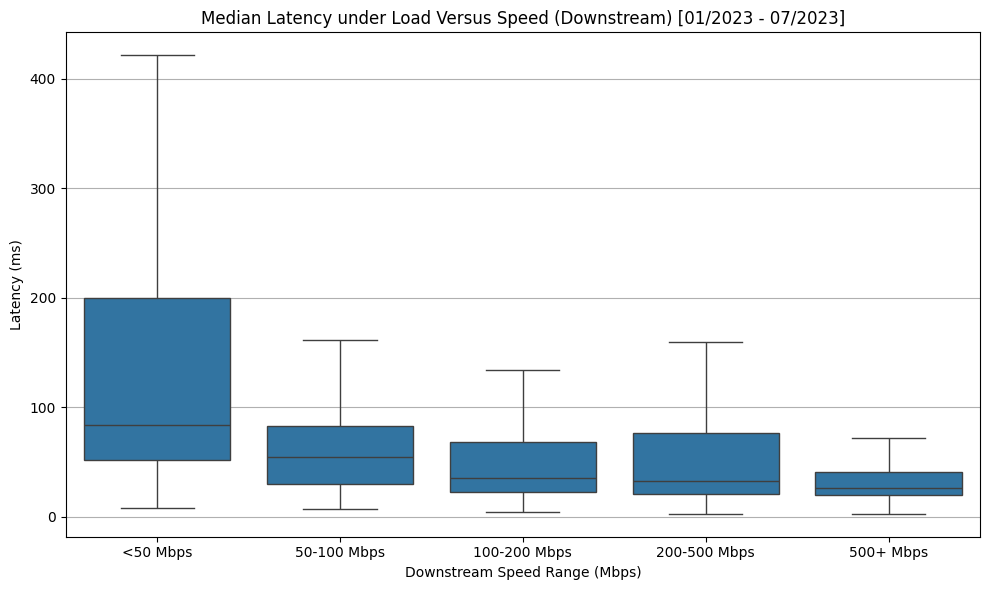

In [8]:
plot_latency(down, 'Downstream')

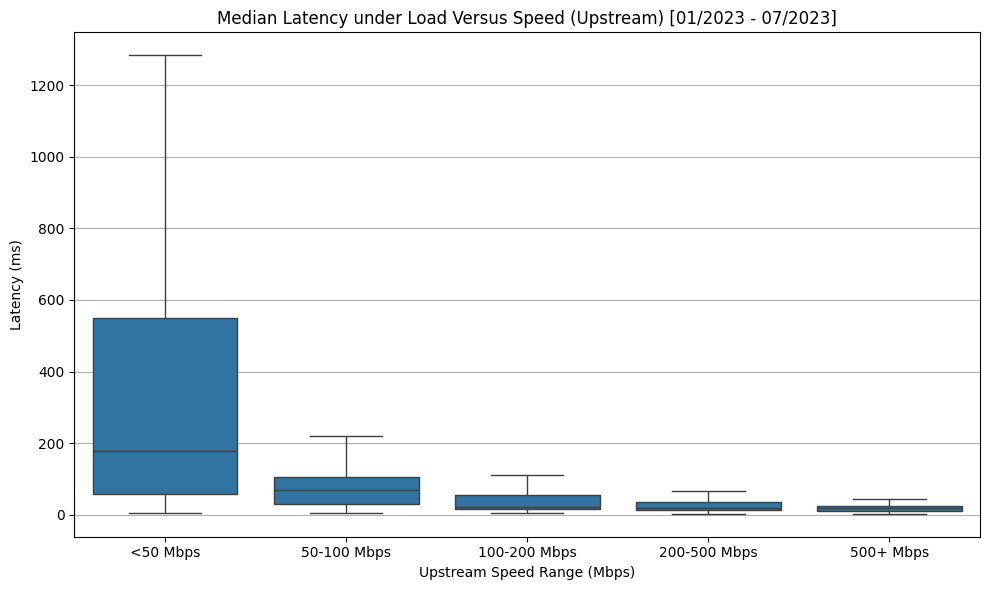

In [9]:
plot_latency(up, 'Upstream')